In [37]:
import numpy as np
import random as rd
import seaborn as sns
import pandas as pd
import librosa
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('./db/UrbanSound8K.csv')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [40]:
#   GET SOUND TYPES
types = data.loc[:, 'class'].unique()
print(types)

['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


In [47]:
class SoundProcessing:
    @staticmethod
    def make_plot(file, type: str):
        sound, bitrate = librosa.load(file)
        plt.plot(sound)
        plt.title(type)
        plt.ylabel("Amplitude")
        plt.xlabel("Time")
        plt.show()

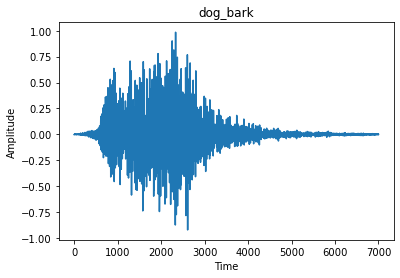

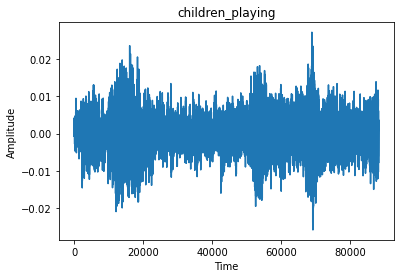

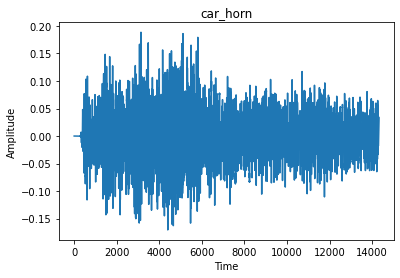

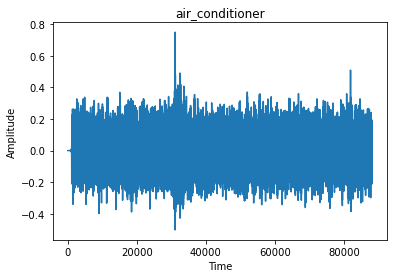

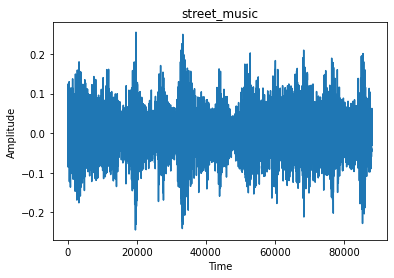

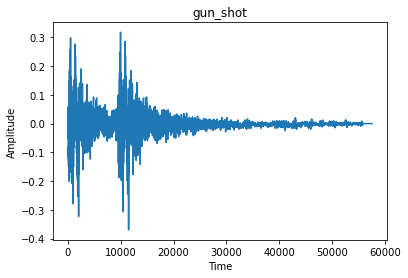

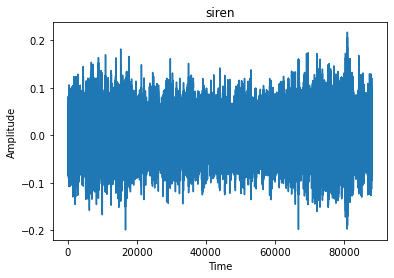

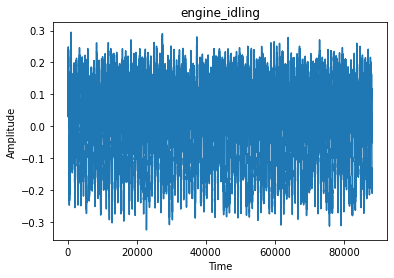

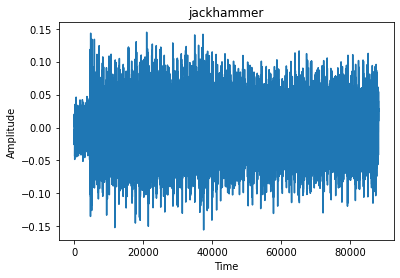

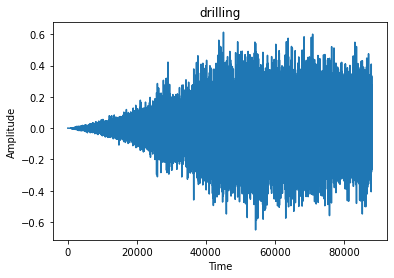

In [48]:
#   PRINT PLOT FOR EVERY TYPE
for type in types:
    sample = data.loc[data['class'] == type].head(1)
    file = sample.iloc[0, 0]
    fold = sample.iloc[0, 5]
    SoundProcessing.make_plot(f'./db/fold{fold}/{file}', type)